In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from my_utils import * 
from IPython.display import display

# Load the dataset
file_path = r"C:\Users\AVI SHARMA\Documents\CSV-FILES\global_house_purchase_dataset.csv"
data = pd.read_csv(file_path)
data.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_id              200000 non-null  int64  
 1   country                  200000 non-null  object 
 2   city                     200000 non-null  object 
 3   property_type            200000 non-null  object 
 4   furnishing_status        200000 non-null  object 
 5   property_size_sqft       200000 non-null  int64  
 6   price                    200000 non-null  int64  
 7   constructed_year         200000 non-null  int64  
 8   previous_owners          200000 non-null  int64  
 9   rooms                    200000 non-null  int64  
 10  bathrooms                200000 non-null  int64  
 11  garage                   200000 non-null  int64  
 12  garden                   200000 non-null  int64  
 13  crime_cases_reported     200000 non-null  int64  
 14  lega

Initial Data quality check

,Missing Count,Missing Percentage
property_id,0,0.00%
country,0,0.00%
city,0,0.00%
property_type,0,0.00%
furnishing_status,0,0.00%
property_size_sqft,0,0.00%
price,0,0.00%
constructed_year,0,0.00%
previous_owners,0,0.00%
rooms,0,0.00%


Missing values: 0
Duplicate values: 0


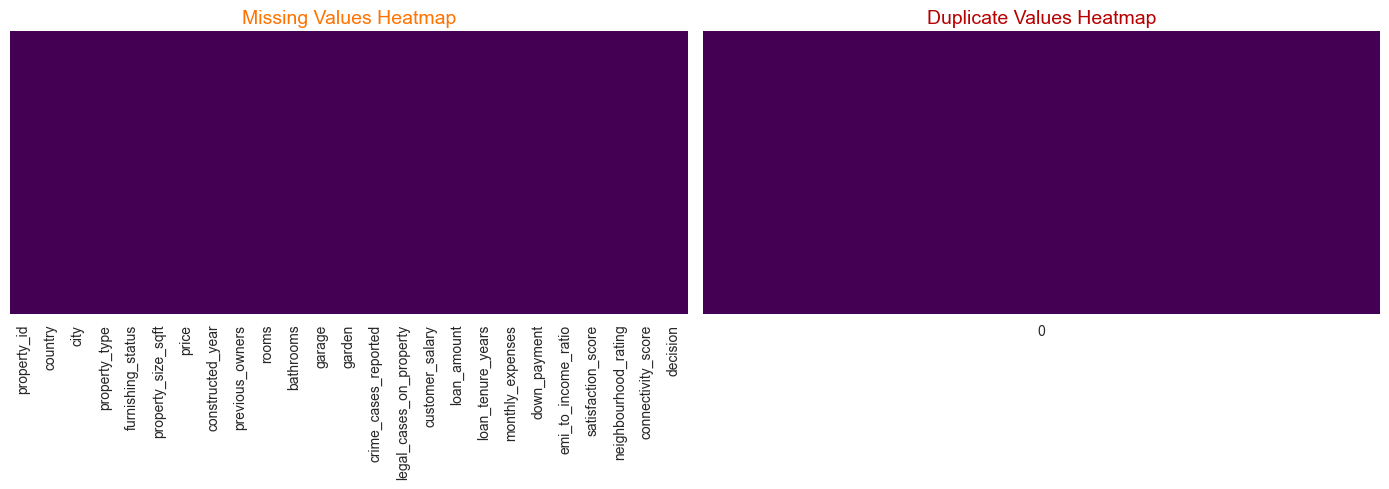

In [5]:
display(missing_summary(data, caption="Initial Missing Data and Duplicates Summary"))
missing_duplicate_heatmap(data)

Descriptive Statistics

In [6]:
describe_styled(data, caption="Initial Data Summary")

,count,mean,std,min,25%,50%,75%,max
property_id,200000.000000,100000.500000,57735.171256,1.000000,50000.750000,100000.500000,150000.250000,200000.000000
property_size_sqft,200000.000000,3195.633460,1613.322287,400.000000,1802.000000,3190.000000,4589.000000,6000.000000
price,200000.000000,1215365.127500,823663.258915,56288.000000,565989.500000,1023429.000000,1725556.500000,4202732.000000
constructed_year,200000.000000,1991.487770,18.494064,1960.000000,1975.000000,1991.000000,2008.000000,2023.000000
previous_owners,200000.000000,3.001370,2.002198,0.000000,1.000000,3.000000,5.000000,6.000000
rooms,200000.000000,4.513855,2.295669,1.000000,3.000000,5.000000,7.000000,8.000000
bathrooms,200000.000000,2.760030,1.840959,1.000000,1.000000,2.000000,4.000000,8.000000
garage,200000.000000,0.499350,0.500001,0.000000,0.000000,0.000000,1.000000,1.000000
garden,200000.000000,0.500215,0.500001,0.000000,0.000000,1.000000,1.000000,1.000000
crime_cases_reported,200000.000000,1.229065,1.185336,0.000000,0.000000,1.000000,2.000000,10.000000


Analyze Skewness and Distributions

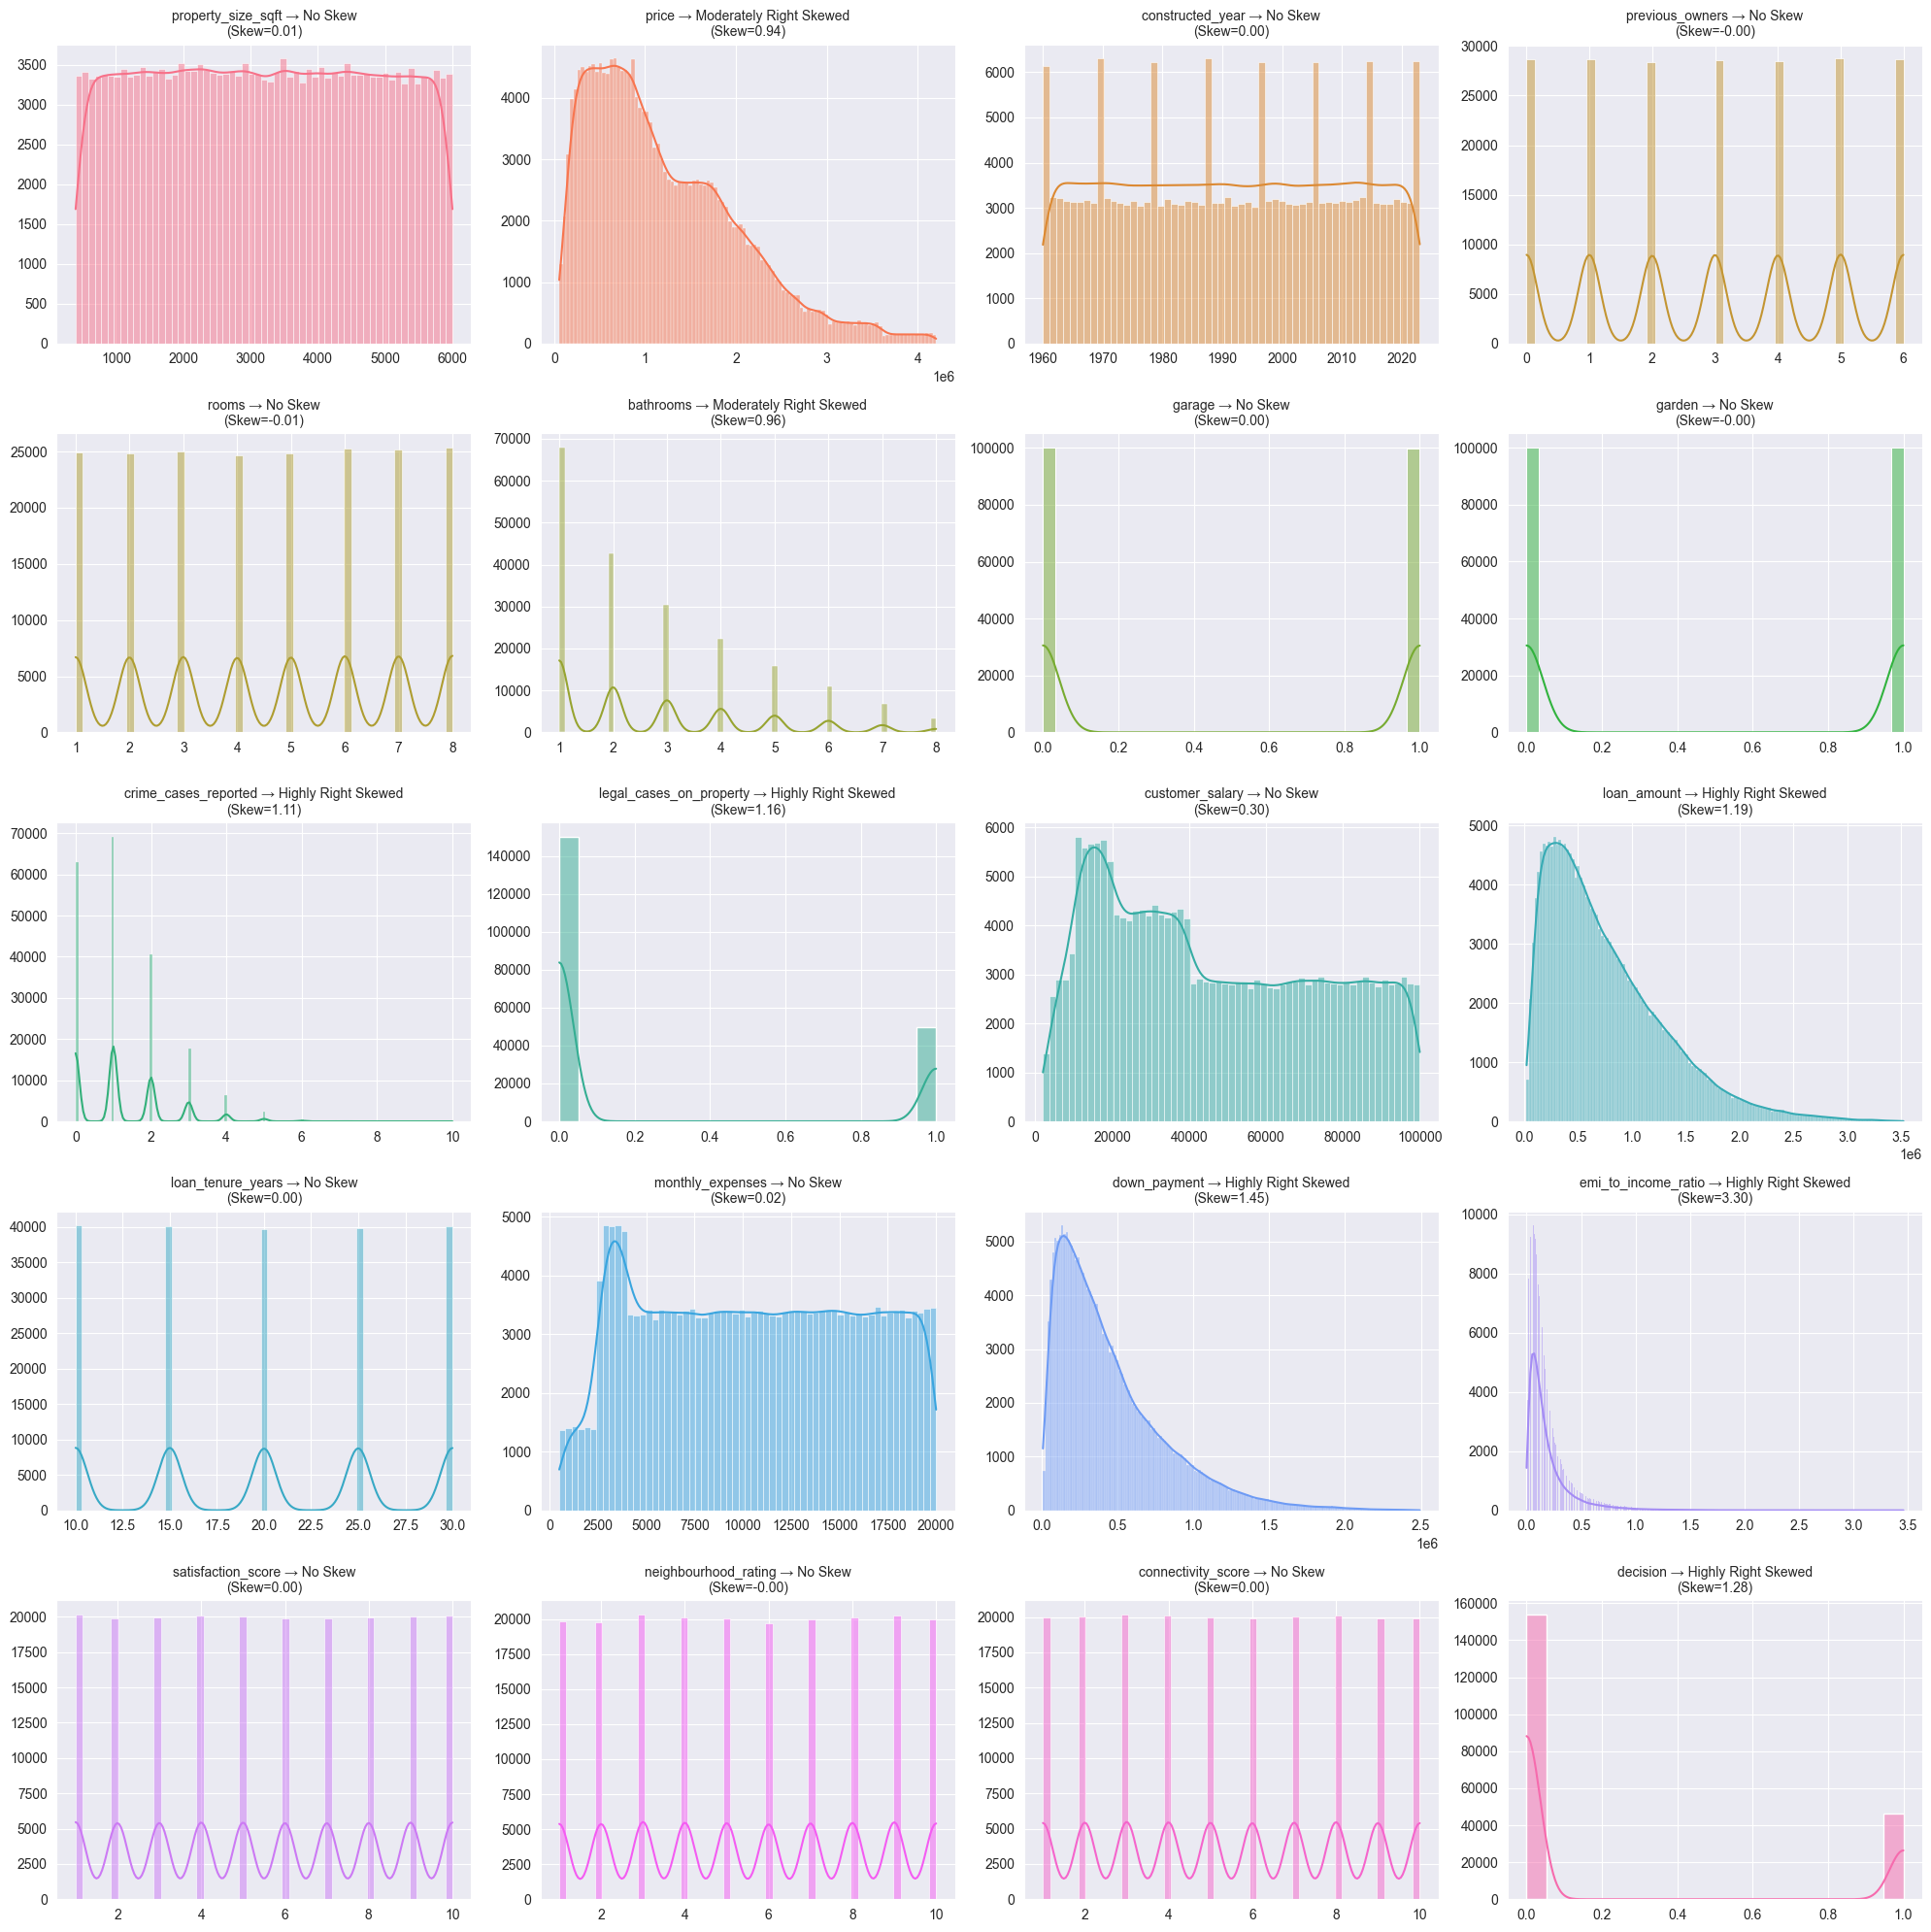

In [7]:
numeric_cols = data.select_dtypes(include=np.number).columns.drop('property_id')

# Ploting histograms for numeric columns
hist_with_skewness(data, numeric_cols=numeric_cols.tolist(), cols_plot=4)

Outlier Detection

,Column Name,Outlier Count,Total Count,Outlier %,Outlier Type
0,property_size_sqft,0,200000,0.00%,No Outliers
1,price,3374,200000,1.69%,Moderate Outliers
2,constructed_year,0,200000,0.00%,No Outliers
3,previous_owners,0,200000,0.00%,No Outliers
4,rooms,0,200000,0.00%,No Outliers
5,bathrooms,0,200000,0.00%,No Outliers
6,garage,0,200000,0.00%,No Outliers
7,garden,0,200000,0.00%,No Outliers
8,crime_cases_reported,795,200000,0.40%,Very Few Outliers
9,legal_cases_on_property,49784,200000,24.89%,Severe Outliers


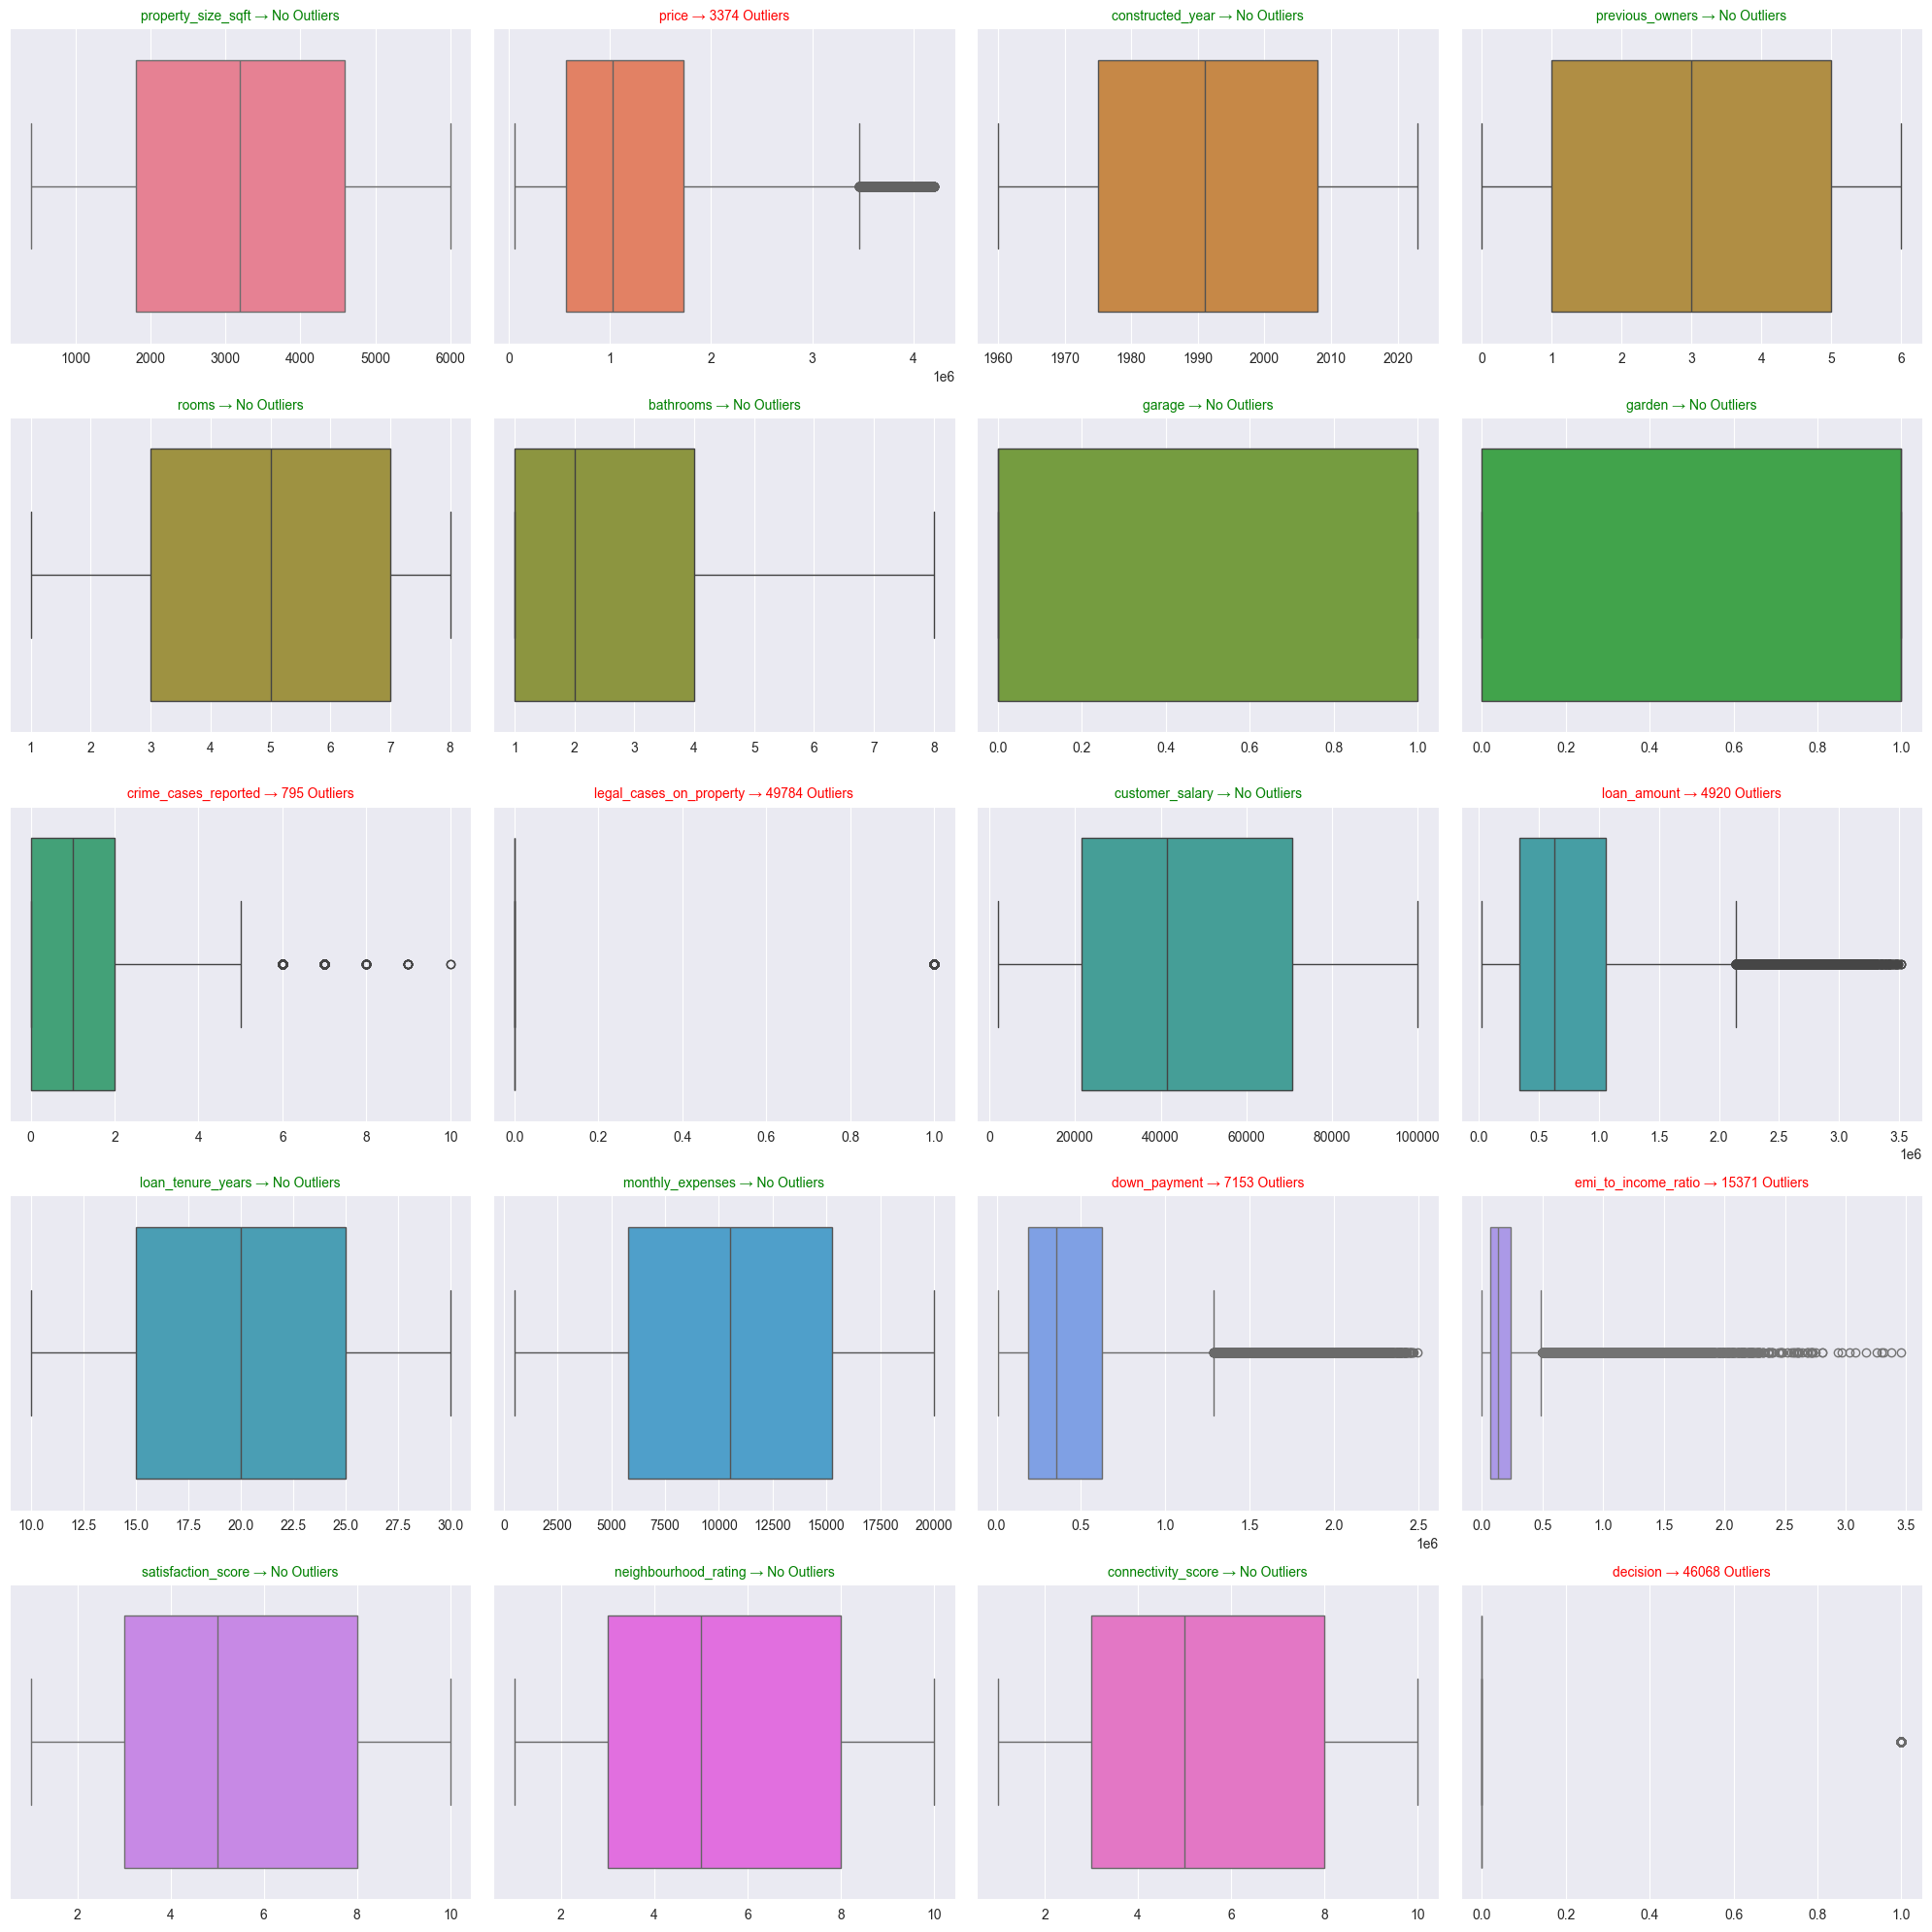

In [8]:
# summary of outliers
display(outliers_styled(data, numeric_cols=numeric_cols.tolist()))

# Visualizing the outliers with boxplots
box_with_outliers(data, numeric_cols=numeric_cols.tolist(), cols_plot=4)

Visualizing Relationships (Bivariate Analysis)

c:\Users\AVI SHARMA\Documents\work\my_utils.py:338: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_func(**plot_args, **kwargs)


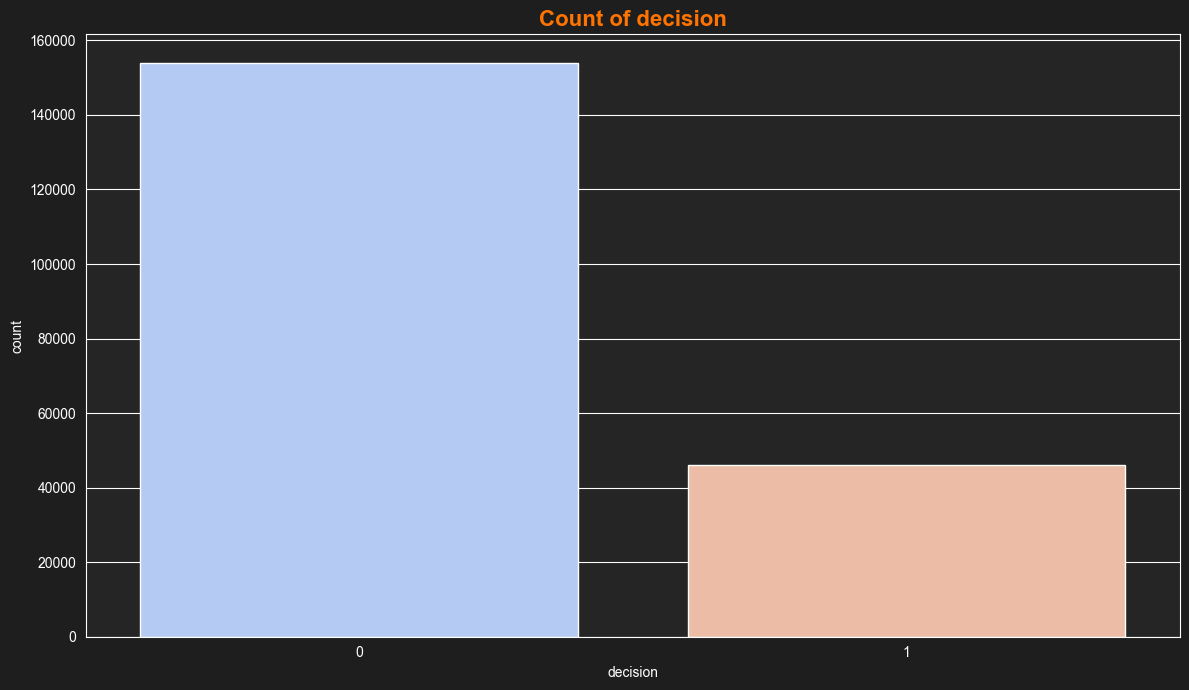

c:\Users\AVI SHARMA\Documents\work\my_utils.py:338: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_func(**plot_args, **kwargs)


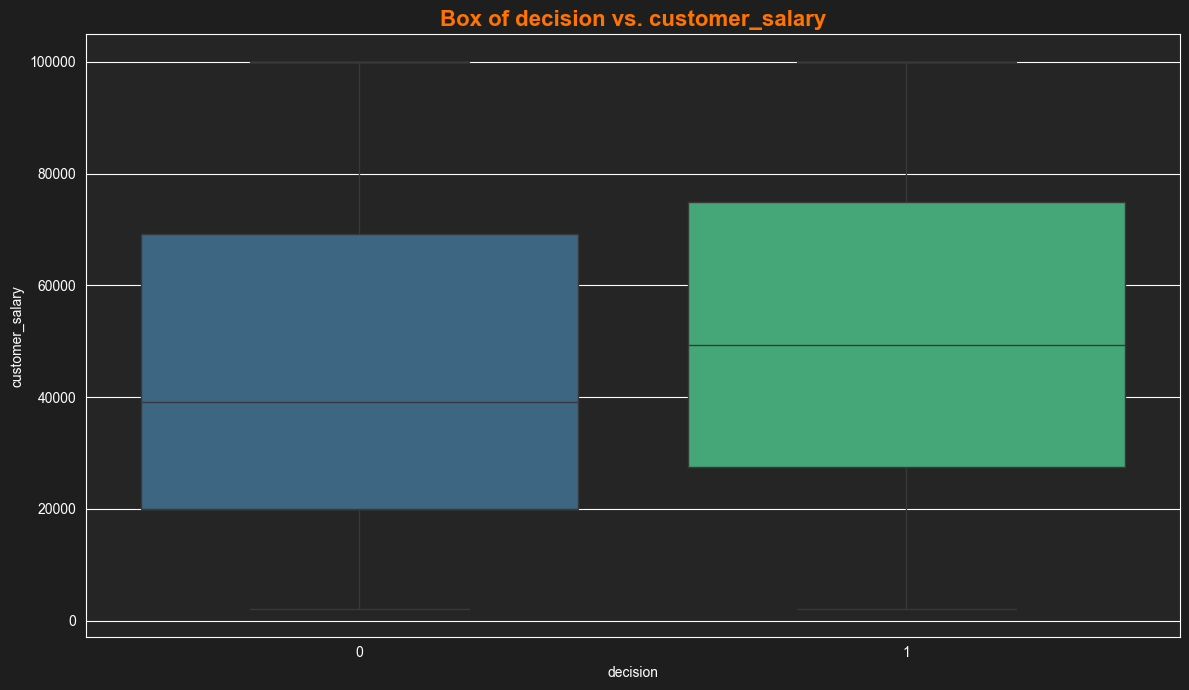

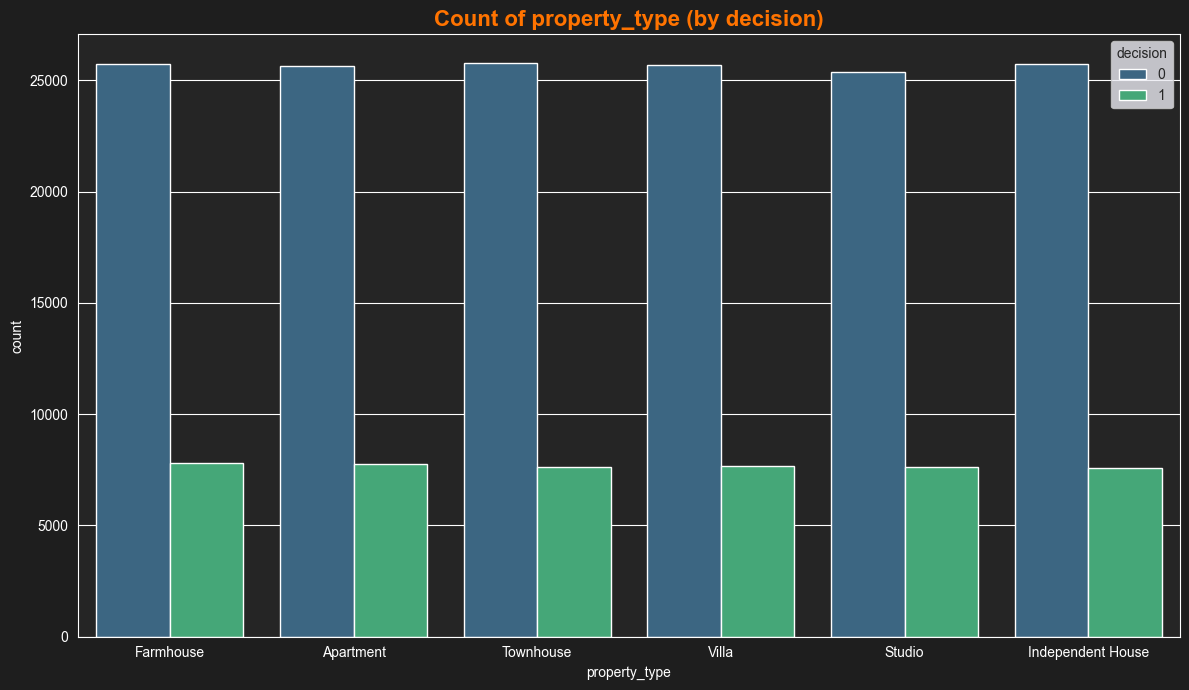

In [9]:
# Visualize the distribution of our target variable
plot_visualizations(data, 'count', x='decision', theme='custom_dark', palette='coolwarm')
plot_visualizations(data, 'box', x='decision', y='customer_salary', theme='custom_dark')
plot_visualizations(data, 'count', x='property_type', hue='decision', theme='custom_dark')

Preprocessing and Feature Engineering

In [10]:
# Droping Identifier 
print("--- Dropping Identifier Column ---")
df_processed = data.drop('property_id', axis=1)
print("Shape after dropping ID:", df_processed.shape)

# Outlier Removal ,removeing outliers from the most skewed columns
cols_for_outlier_removal = ['price', 'loan_amount', 'down_payment', 'emi_to_income_ratio']
df_processed = remove_outliers(df_processed, numeric_cols=cols_for_outlier_removal, method='iqr')
print("Shape after removing outliers:", df_processed.shape)

# disposable_income
df_processed['disposable_income'] = df_processed['customer_salary'] - df_processed['monthly_expenses']
print("\n Created 'disposable_income' feature ")
display(df_processed.head())

# Encoding Categorical Features
furnishing_order = ['Unfurnished', 'Semi-Furnished', 'Fully-Furnished']
df_processed, ordinal_fitter = encode_features(
    df_processed, 
    cols_to_encode=['furnishing_status'],
    encoding_type='ordinal',
    categories={'furnishing_status': furnishing_order}
)

nominal_cols = ['country', 'city', 'property_type']
df_processed, onehot_fitter = encode_features(
    df_processed, 
    cols_to_encode=nominal_cols,
    encoding_type='onehot',
    drop_first=True
)

# Feature Selection using Correlation checking for multicollinearity
highly_correlated_features = correlation_feature_selection(df_processed, threshold=0.90)
if 'loan_amount' in highly_correlated_features:
    print("\n Dropping 'loan_amount' due to high correlation with 'price'")
    df_processed = df_processed.drop('loan_amount', axis=1)

# Scaling Numeric Features 
numeric_cols_final = df_processed.select_dtypes(include=np.number).columns.drop('decision')
df_scaled, scaler = scale_features(df_processed, numeric_cols=numeric_cols_final.tolist(), method='standard')
print("\n Preprocessing Complete!")
display(df_scaled.head())

--- Dropping Identifier Column ---
Shape after dropping ID: (200000, 24)
--- Outlier Removal Applied using iqr method ---


,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


Shape after removing outliers: (172071, 24)

 Created 'disposable_income' feature 


,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision,disposable_income
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,...,193949,15,6545,218986,0.16,1,5,6,0,4200
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,181465,20,8605,43073,0.08,9,1,2,0,8365
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,307953,30,2510,437151,0.09,6,8,1,0,19404
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,674720,15,8805,436239,0.33,2,6,6,0,9175
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,65833,25,8965,33208,0.03,3,3,4,0,8711


--- Applying Ordinal Encoding on ['furnishing_status'] ---
Encoding complete. Displaying the head of the transformed data:


,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision,disposable_income
0,France,Marseille,Farmhouse,1.0,991,412935,1989,6,6,2,...,193949,15,6545,218986,0.16,1,5,6,0,4200
1,South Africa,Cape Town,Apartment,1.0,1244,224538,1990,4,8,8,...,181465,20,8605,43073,0.08,9,1,2,0,8365
2,South Africa,Johannesburg,Farmhouse,1.0,4152,745104,2019,5,2,1,...,307953,30,2510,437151,0.09,6,8,1,0,19404
3,Germany,Frankfurt,Farmhouse,1.0,3714,1110959,2008,1,3,3,...,674720,15,8805,436239,0.33,2,6,6,0,9175
4,South Africa,Johannesburg,Townhouse,2.0,531,99041,2007,6,3,3,...,65833,25,8965,33208,0.03,3,3,4,0,8711


--- Applying Onehot Encoding on ['country', 'city', 'property_type'] ---
Encoding complete. Displaying the head of the transformed data:


,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,...,city_Sydney,city_São Paulo,city_Tokyo,city_Toronto,city_Vancouver,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa
0,1.0,991,412935,1989,6,6,2,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1244,224538,1990,4,8,8,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4152,745104,2019,5,2,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,3714,1110959,2008,1,3,3,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,531,99041,2007,6,3,3,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Highly correlated features (threshold=0.9): ['city_Singapore', 'disposable_income', 'loan_amount']



 Dropping 'loan_amount' due to high correlation with 'price'
--- Scaling Method Applied: standard ---


,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,...,city_Sydney,city_São Paulo,city_Tokyo,city_Toronto,city_Vancouver,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa
0,-0.001894,-1.255210,-0.979165,-0.135670,1.497298,0.648581,-0.412393,1.000471,0.998751,-0.194247,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,2.227290,-0.447527,-0.444868,-0.447256,-0.447228
1,-0.001894,-1.092762,-1.269308,-0.081614,0.498591,1.519630,2.845906,1.000471,0.998751,-0.194247,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,-0.448976,-0.447527,-0.444868,-0.447256,-0.447228
2,-0.001894,0.774430,-0.467605,1.485999,0.997944,-1.093519,-0.955443,1.000471,0.998751,-1.037530,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,2.227290,-0.447527,-0.444868,-0.447256,-0.447228
3,-0.001894,0.493195,0.095834,0.891387,-0.999471,-0.657994,0.130657,-0.999529,0.998751,-1.037530,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,2.227290,-0.447527,-0.444868,-0.447256,-0.447228
4,1.223483,-1.550571,-1.462581,0.837331,1.497298,-0.657994,0.130657,1.000471,0.998751,1.492318,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,-0.448976,-0.447527,-0.444868,2.235857,-0.447228



 Preprocessing Complete!


,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,...,city_Sydney,city_São Paulo,city_Tokyo,city_Toronto,city_Vancouver,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa
0,-0.001894,-1.255210,-0.979165,-0.135670,1.497298,0.648581,-0.412393,1.000471,0.998751,-0.194247,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,2.227290,-0.447527,-0.444868,-0.447256,-0.447228
1,-0.001894,-1.092762,-1.269308,-0.081614,0.498591,1.519630,2.845906,1.000471,0.998751,-0.194247,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,-0.448976,-0.447527,-0.444868,-0.447256,-0.447228
2,-0.001894,0.774430,-0.467605,1.485999,0.997944,-1.093519,-0.955443,1.000471,0.998751,-1.037530,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,2.227290,-0.447527,-0.444868,-0.447256,-0.447228
3,-0.001894,0.493195,0.095834,0.891387,-0.999471,-0.657994,0.130657,-0.999529,0.998751,-1.037530,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,2.227290,-0.447527,-0.444868,-0.447256,-0.447228
4,1.223483,-1.550571,-1.462581,0.837331,1.497298,-0.657994,0.130657,1.000471,0.998751,1.492318,...,-0.17221,-0.205313,-0.164638,-0.170123,-0.172567,-0.448976,-0.447527,-0.444868,2.235857,-0.447228


Handling Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Spliting features and target variable
X = df_scaled.drop('decision', axis=1)
y = df_scaled['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Before SMOTE")
print("Training set shape:", X_train.shape)
print("Class distribution in training set:\n", y_train.value_counts())

Before SMOTE
Training set shape: (137656, 76)
Class distribution in training set:
 decision
0    102750
1     34906
Name: count, dtype: int64


--- Visualizing Class Distribution BEFORE SMOTE ---


c:\Users\AVI SHARMA\Documents\work\my_utils.py:338: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_func(**plot_args, **kwargs)


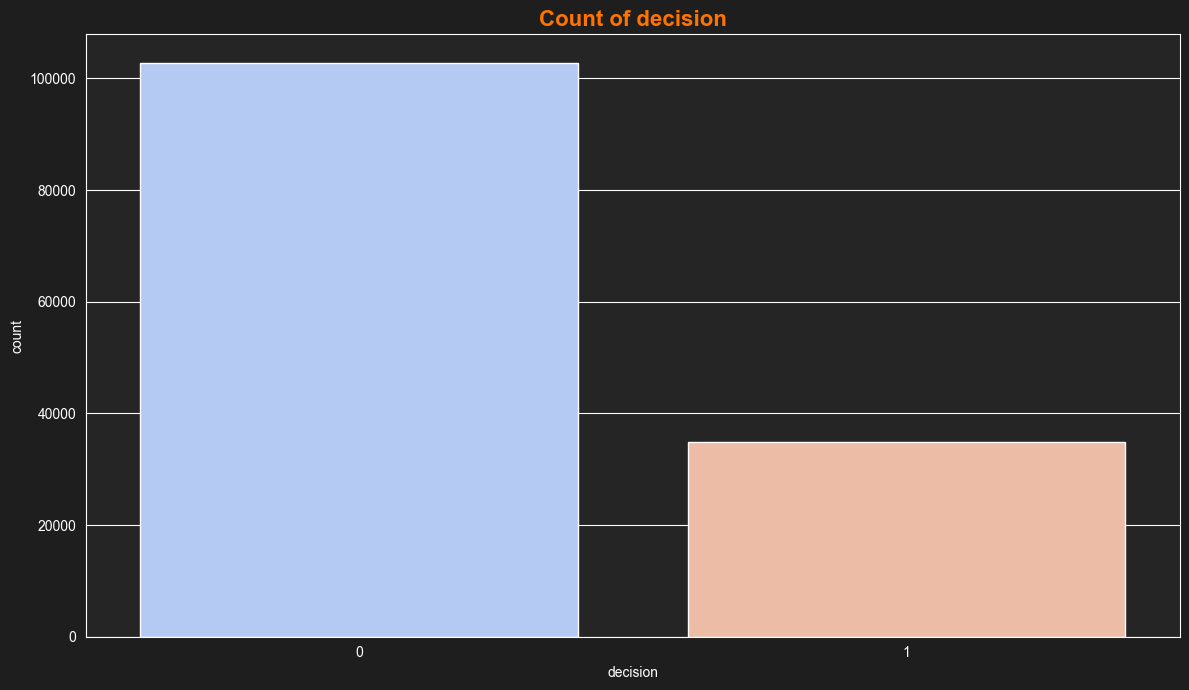

In [12]:
print("--- Visualizing Class Distribution BEFORE SMOTE ---")
plot_visualizations(pd.DataFrame(y_train, columns=['decision']), 'count', x='decision', theme='custom_dark', palette='coolwarm')


--- After SMOTE ---
Resampled training set shape: (205500, 76)
Class distribution in resampled training set:
 decision
0    102750
1    102750
Name: count, dtype: int64
Visualizing Class Distribution AFTER SMOTE


c:\Users\AVI SHARMA\Documents\work\my_utils.py:338: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_func(**plot_args, **kwargs)


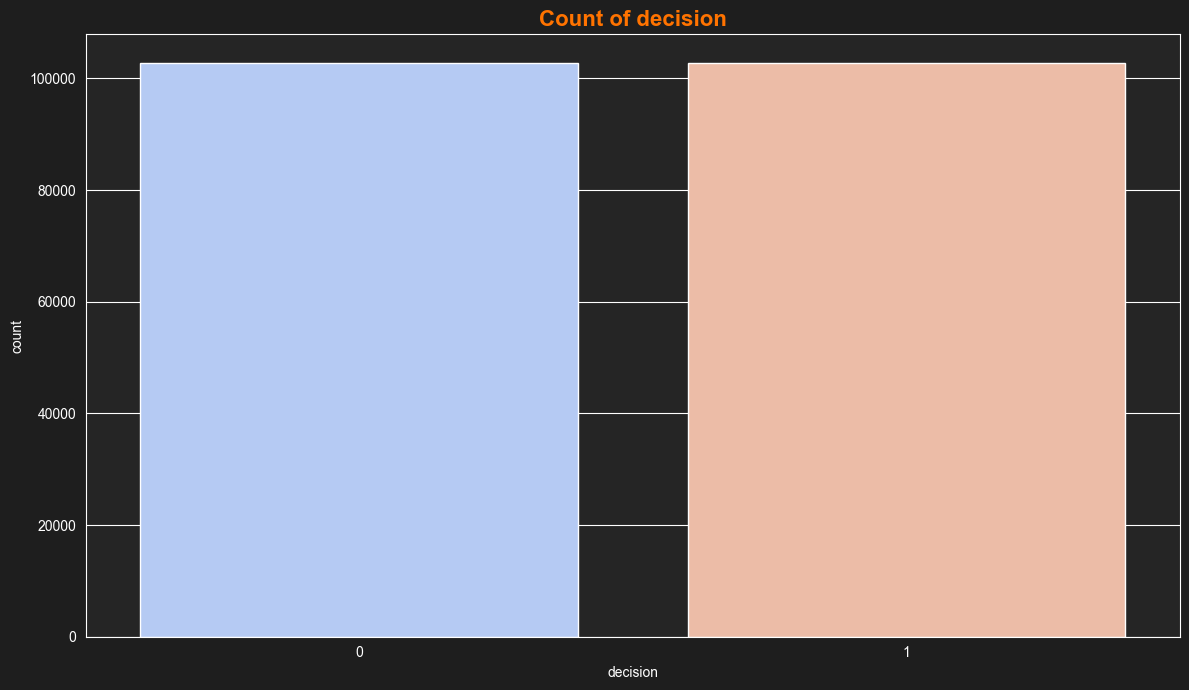

In [13]:
# Applying 'smote' to the Training Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- After SMOTE ---")
print("Resampled training set shape:", X_train_resampled.shape)
print("Class distribution in resampled training set:\n", y_train_resampled.value_counts())

print("Visualizing Class Distribution AFTER SMOTE")
plot_visualizations(pd.DataFrame(y_train_resampled, columns=['decision']), 'count', x='decision', theme='custom_dark', palette='coolwarm')

Random Forest Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25688
           1       1.00      1.00      1.00      8727

    accuracy                           1.00     34415
   macro avg       1.00      1.00      1.00     34415
weighted avg       1.00      1.00      1.00     34415



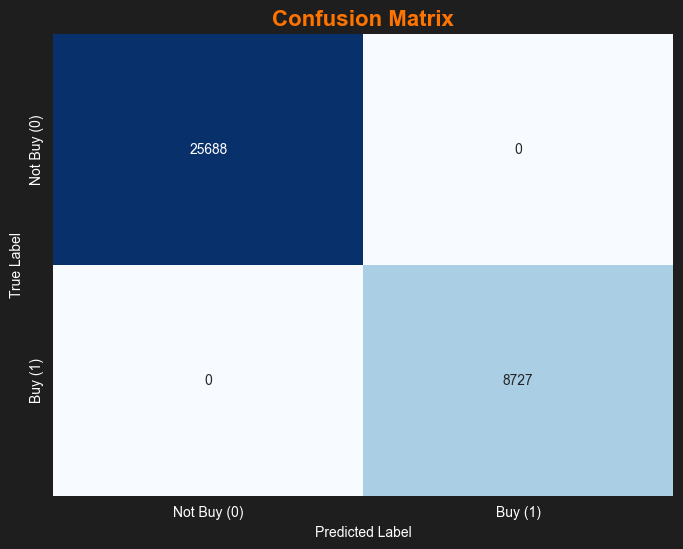

C:\Users\AVI SHARMA\AppData\Local\Temp\ipykernel_29560\2562979993.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


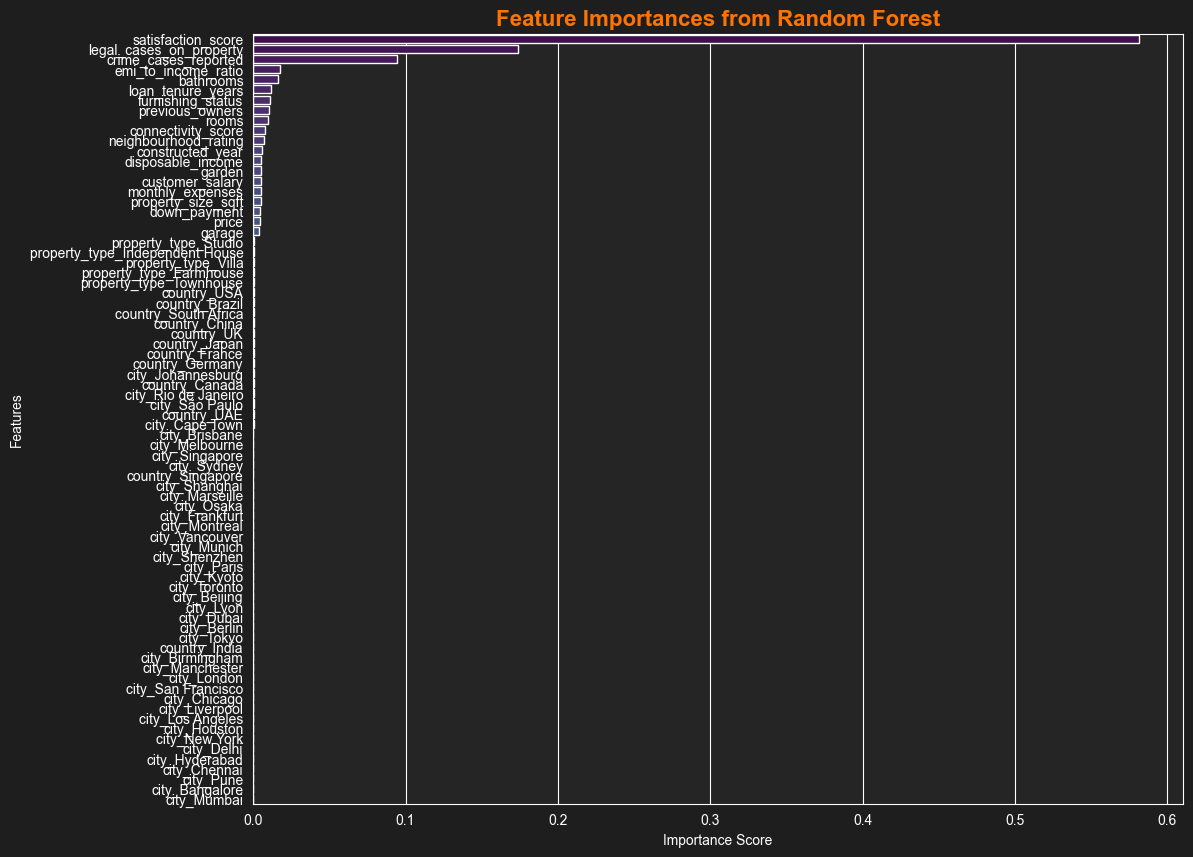

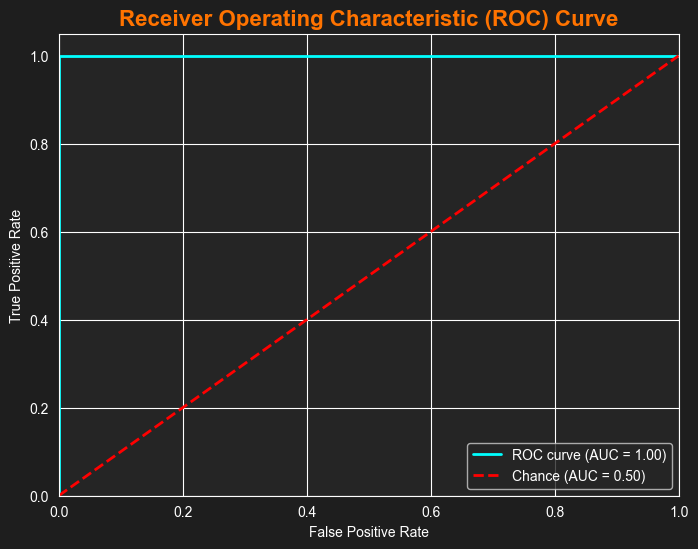

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# using 'random forest' and resampled data for training
rf_model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf))

# visualizations : 
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#252525'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Visualization 1: Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Buy (0)', 'Buy (1)'],
            yticklabels=['Not Buy (0)', 'Buy (1)'])
plt.title('Confusion Matrix', fontsize=16, color='#ff7300', weight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization 2: Feature Importance Plot
plt.figure(figsize=(12, 10))
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Feature Importances from Random Forest', fontsize=16, color='#ff7300', weight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Visualization 3: ROC Curve and AUC Score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='cyan', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, color='#ff7300', weight='bold')
plt.legend(loc="lower right")
plt.show()

Solving red flag problem

In [ ]:
leaky_features = [
    'loan_amount',
    'down_payment',
    'emi_to_income_ratio',
    'satisfaction_score' 
]

# Removing Leaky Features and making new dataset
new_data = data.drop(columns=leaky_features)
print(f"Removed {len(leaky_features)} leaky features.")
print("Columns remaining for the model:", new_data.columns.tolist())

print("Shape of the corrected data:", new_data.shape)

Removed 4 leaky features.
Columns remaining for the model: ['property_id', 'country', 'city', 'property_type', 'furnishing_status', 'property_size_sqft', 'price', 'constructed_year', 'previous_owners', 'rooms', 'bathrooms', 'garage', 'garden', 'crime_cases_reported', 'legal_cases_on_property', 'customer_salary', 'loan_tenure_years', 'monthly_expenses', 'neighbourhood_rating', 'connectivity_score', 'decision']
Shape of the corrected data: (200000, 21)


In [16]:
data_processed_realistic = new_data.drop('property_id', axis=1)

In [ ]:
# Outlier Removal on realistic dataset
cols_for_outlier_removal_realistic = ['price']
df_processed_realistic = remove_outliers(data_processed_realistic, numeric_cols=cols_for_outlier_removal_realistic, method='iqr')
print(f"\nShape after removing outliers: {df_processed_realistic.shape}")

--- Outlier Removal Applied using iqr method ---


,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_tenure_years,monthly_expenses,neighbourhood_rating,connectivity_score,decision
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,1,1,1,0,10745,15,6545,5,6,0
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,1,1,1,1,16970,20,8605,1,2,0
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,1,1,0,0,21914,30,2510,8,1,0
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,0,1,0,0,17980,15,8805,6,6,0
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,1,1,3,1,17676,25,8965,3,4,0



Shape after removing outliers: (196626, 20)


In [ ]:
# disposable_income
df_processed_realistic['disposable_income'] = df_processed_realistic['customer_salary'] - df_processed_realistic['monthly_expenses']

In [ ]:
# Encoding Categorical Features
furnishing_order = ['Unfurnished', 'Semi-Furnished', 'Fully-Furnished']
df_processed_realistic, _ = encode_features(
    df_processed_realistic,
    cols_to_encode=['furnishing_status'],
    encoding_type='ordinal',
    categories={'furnishing_status': furnishing_order}
)

nominal_cols = ['country', 'city', 'property_type']
df_processed_realistic, _ = encode_features(
    df_processed_realistic,
    cols_to_encode=nominal_cols,
    encoding_type='onehot',
    drop_first=True
)

--- Applying Ordinal Encoding on ['furnishing_status'] ---
Encoding complete. Displaying the head of the transformed data:


,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_tenure_years,monthly_expenses,neighbourhood_rating,connectivity_score,decision,disposable_income
0,France,Marseille,Farmhouse,1.0,991,412935,1989,6,6,2,...,1,1,0,10745,15,6545,5,6,0,4200
1,South Africa,Cape Town,Apartment,1.0,1244,224538,1990,4,8,8,...,1,1,1,16970,20,8605,1,2,0,8365
2,South Africa,Johannesburg,Farmhouse,1.0,4152,745104,2019,5,2,1,...,1,0,0,21914,30,2510,8,1,0,19404
3,Germany,Frankfurt,Farmhouse,1.0,3714,1110959,2008,1,3,3,...,1,0,0,17980,15,8805,6,6,0,9175
4,South Africa,Johannesburg,Townhouse,2.0,531,99041,2007,6,3,3,...,1,3,1,17676,25,8965,3,4,0,8711


--- Applying Onehot Encoding on ['country', 'city', 'property_type'] ---
Encoding complete. Displaying the head of the transformed data:


,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,...,city_Sydney,city_São Paulo,city_Tokyo,city_Toronto,city_Vancouver,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa
0,1.0,991,412935,1989,6,6,2,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1244,224538,1990,4,8,8,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4152,745104,2019,5,2,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,3714,1110959,2008,1,3,3,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,531,99041,2007,6,3,3,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# scaling Numeric Features
numeric_cols_final_realistic = df_processed_realistic.select_dtypes(include=np.number).columns.drop('decision')
df_scaled_realistic, scaler_realistic = scale_features(df_processed_realistic, numeric_cols=numeric_cols_final_realistic.tolist(), method='standard')


--- Scaling Method Applied: standard ---


,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,...,city_Sydney,city_São Paulo,city_Tokyo,city_Toronto,city_Vancouver,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa
0,-0.002211,-1.355558,-1.000836,-0.134674,1.497903,0.647655,-0.412844,1.001425,0.999492,-0.196270,...,-0.16387,-0.202632,-0.164621,-0.162787,-0.165028,2.229743,-0.447345,-0.444886,-0.447738,-0.447271
1,-0.002211,-1.197095,-1.249462,-0.080590,0.499050,1.518955,2.846598,1.001425,0.999492,-0.196270,...,-0.16387,-0.202632,-0.164621,-0.162787,-0.165028,-0.448482,-0.447345,-0.444886,-0.447738,-0.447271
2,-0.002211,0.624289,-0.562476,1.487866,0.998477,-1.094946,-0.956084,1.001425,0.999492,-1.038167,...,-0.16387,-0.202632,-0.164621,-0.162787,-0.165028,2.229743,-0.447345,-0.444886,-0.447738,-0.447271
3,-0.002211,0.349954,-0.079660,0.892934,-0.999229,-0.659296,0.130396,-0.998577,0.999492,-1.038167,...,-0.16387,-0.202632,-0.164621,-0.162787,-0.165028,2.229743,-0.447345,-0.444886,-0.447738,-0.447271
4,1.222644,-1.643672,-1.415080,0.838850,1.497903,-0.659296,0.130396,1.001425,0.999492,1.487524,...,-0.16387,-0.202632,-0.164621,-0.162787,-0.165028,-0.448482,-0.447345,-0.444886,2.233451,-0.447271


In [21]:
# spliting and resampling
X_realistic = df_scaled_realistic.drop('decision', axis=1)
y_realistic = df_scaled_realistic['decision']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_realistic, y_realistic, test_size=0.2, random_state=42, stratify=y_realistic)

smote = SMOTE(random_state=42)
X_train_resampled_r, y_train_resampled_r = smote.fit_resample(X_train_r, y_train_r)

In [22]:
# Training Random Forest on realistic dataset
rf_model_realistic = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf_model_realistic.fit(X_train_resampled_r, y_train_resampled_r)

y_pred_realistic = rf_model_realistic.predict(X_test_r)
print("\n Realistic Random Forest Evaluation ")
print(classification_report(y_test_r, y_pred_realistic))


 Realistic Random Forest Evaluation 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     30216
           1       0.38      0.17      0.23      9110

    accuracy                           0.74     39326
   macro avg       0.58      0.54      0.54     39326
weighted avg       0.69      0.74      0.70     39326



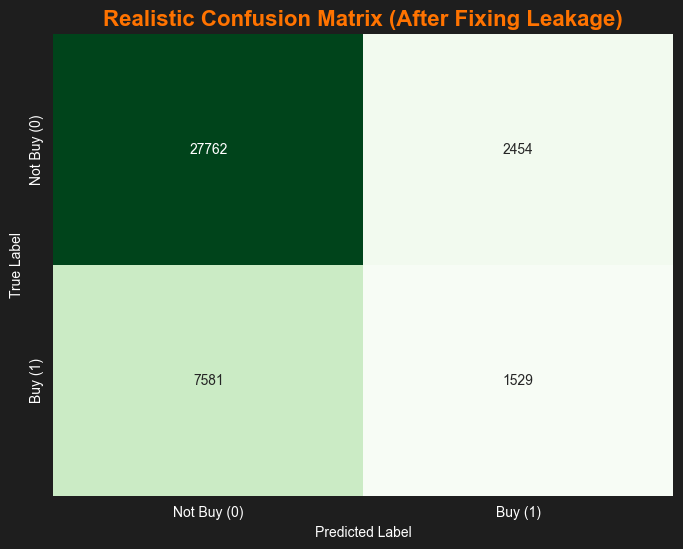

C:\Users\AVI SHARMA\AppData\Local\Temp\ipykernel_29560\3996724674.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_r, y=importances_r.index, palette='plasma')


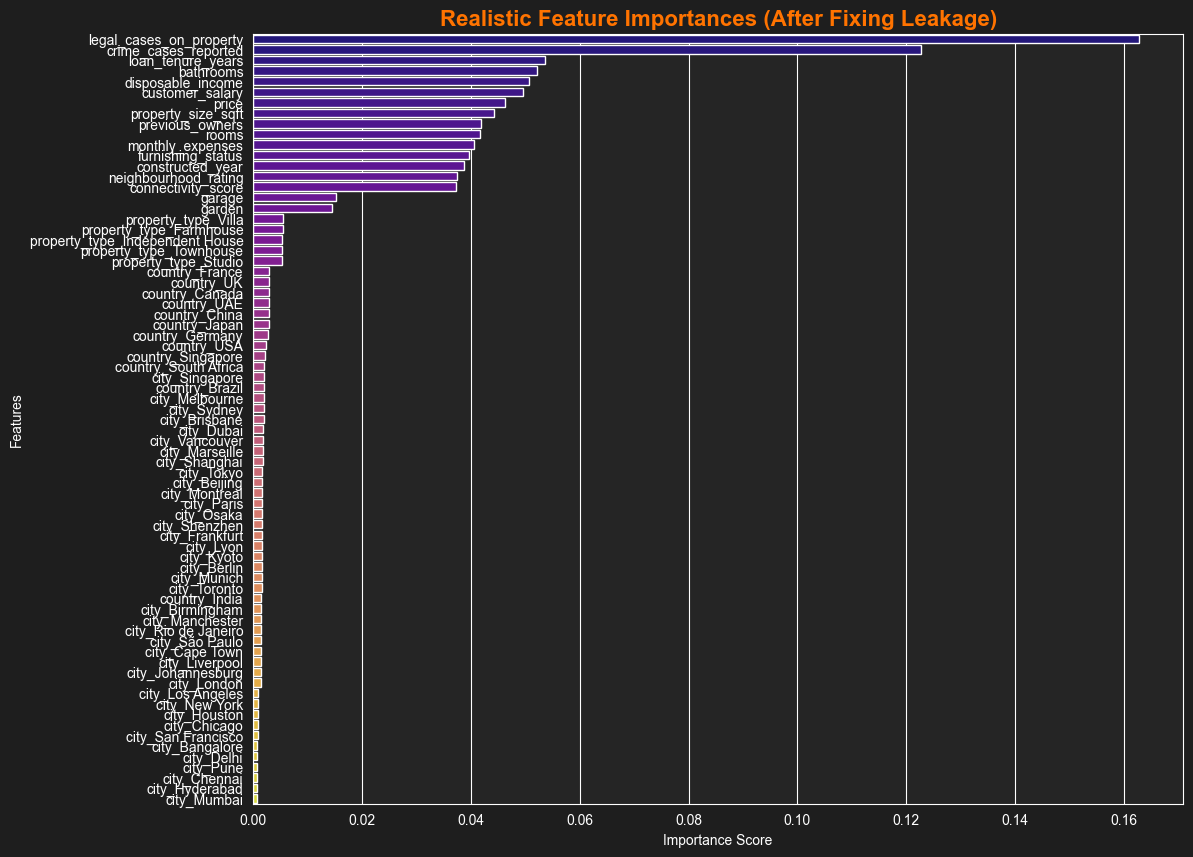

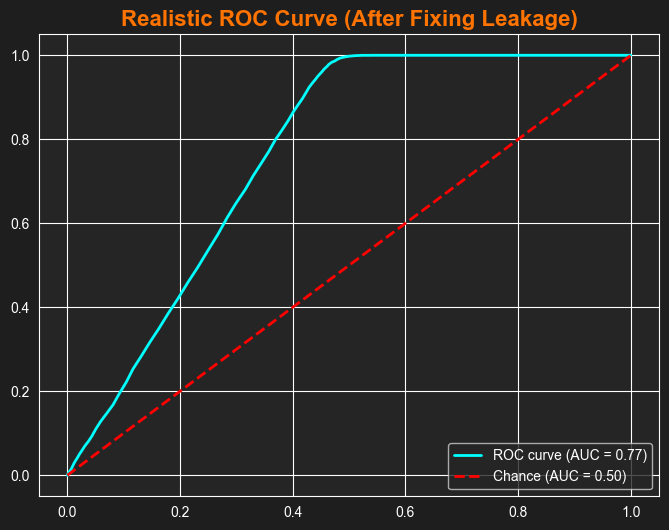

In [23]:
# Visualization 1: Realistic Confusion Matrix
plt.figure(figsize=(8, 6))
cm_r = confusion_matrix(y_test_r, y_pred_realistic)
sns.heatmap(cm_r, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Buy (0)', 'Buy (1)'],
            yticklabels=['Not Buy (0)', 'Buy (1)'])
plt.title('Realistic Confusion Matrix (After Fixing Leakage)', fontsize=16, color='#ff7300', weight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization 2: Realistic Feature Importance Plot
plt.figure(figsize=(12, 10))
importances_r = pd.Series(rf_model_realistic.feature_importances_, index=X_realistic.columns).sort_values(ascending=False)
sns.barplot(x=importances_r, y=importances_r.index, palette='plasma')
plt.title('Realistic Feature Importances (After Fixing Leakage)', fontsize=16, color='#ff7300', weight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Visualization 3: Realistic ROC Curve and AUC Score
y_pred_proba_r = rf_model_realistic.predict_proba(X_test_r)[:, 1]
fpr_r, tpr_r, _ = roc_curve(y_test_r, y_pred_proba_r)
roc_auc_r = auc(fpr_r, tpr_r)

plt.figure(figsize=(8, 6))
plt.plot(fpr_r, tpr_r, color='cyan', lw=2, label=f'ROC curve (AUC = {roc_auc_r:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance (AUC = 0.50)')
plt.title('Realistic ROC Curve (After Fixing Leakage)', fontsize=16, color='#ff7300', weight='bold')
plt.legend(loc="lower right")
plt.show()